# Assignment 3, Exercise 3

In [1]:
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import seaborn as sns

## Simulate Multiple linear regression with induced violated model assumptions
- residuals are not normally distributed
- multi-collinearity: add linear combinations of existing columns
- p > n: previously added columns increase p so that p > n.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [3]:
# in this dataset p=n
X, y, coef = datasets.make_regression(
    n_samples = 10,
    n_features = 10,
    n_informative = 3,
    n_targets = 1,
    noise = 0.5,
    random_state = 42,
    coef = True
    )
X = pd.DataFrame(X)
print(coef)


[41.74110031  0.          0.          0.          0.          0.
  0.          0.         22.21078105 11.98653673]


In [4]:
# let one feature dominate the variance
X[0] = 100*X[0]

In [5]:
X

0         1         2         3         4         5         6  \
0  -47.917424  1.356240  1.003533 -0.645120 -0.072010  0.361636 -1.196207   
1  146.564877  0.110923  0.375698 -0.291694 -1.150994 -0.600639 -1.424748   
2  -21.967189 -0.501757  0.328751  0.513267  0.915402 -0.529760 -0.518270   
3   32.408397  0.931280 -0.309212  0.975545 -0.839218  0.331263  0.611676   
4   73.846658 -0.719844  1.057122 -1.763040 -0.460639  0.343618 -0.301104   
5  -60.170661 -1.220844 -1.959670  0.196861  0.208864 -1.328186 -1.057711   
6   36.139561  0.821903 -0.299007 -1.987569  0.087047  0.091761  1.564644   
7  -46.341769 -0.562288  0.314247 -1.412304 -1.012831 -0.908024 -1.913280   
8    9.707755 -1.463515  0.261055 -0.234587  0.296120  0.005113 -0.327662   
9   49.671415 -0.234137  0.767435  0.542560  1.579213 -0.469474  1.523030   

          7         8         9  
0  0.812526 -0.185659 -1.106335  
1 -0.544383 -0.225776  0.067528  
2 -0.808494  0.357113  1.477894  
3  1.031000 -0.385082 -0.676922  
4 -1.478522  0.171368 -0.115648  
5  0.822545  1.852278 -0.013497  
6 -2.619745  1.538037 -0.035826  
7 -1.724918 -0.465730  0.241962  
8 -0.392108  0.968645 -0.702053  
9 -0.234153 -0.138264  0.647689

In [6]:
# induce perfect multicolinearity
np.random.seed(42)
X[2] = X[3] *-1 + 0.2*np.random.randn(len(X[2]))
X[4] = X[5] *-1 + 0.2*np.random.randn(len(X[2]))

save the data

In [7]:
X.to_csv("mlr_vma.csv",sep=";")

In [8]:
pd.Series(y,name="y").to_csv("y_mlr_vma.csv",sep=";")

# exercise 3 screenshot

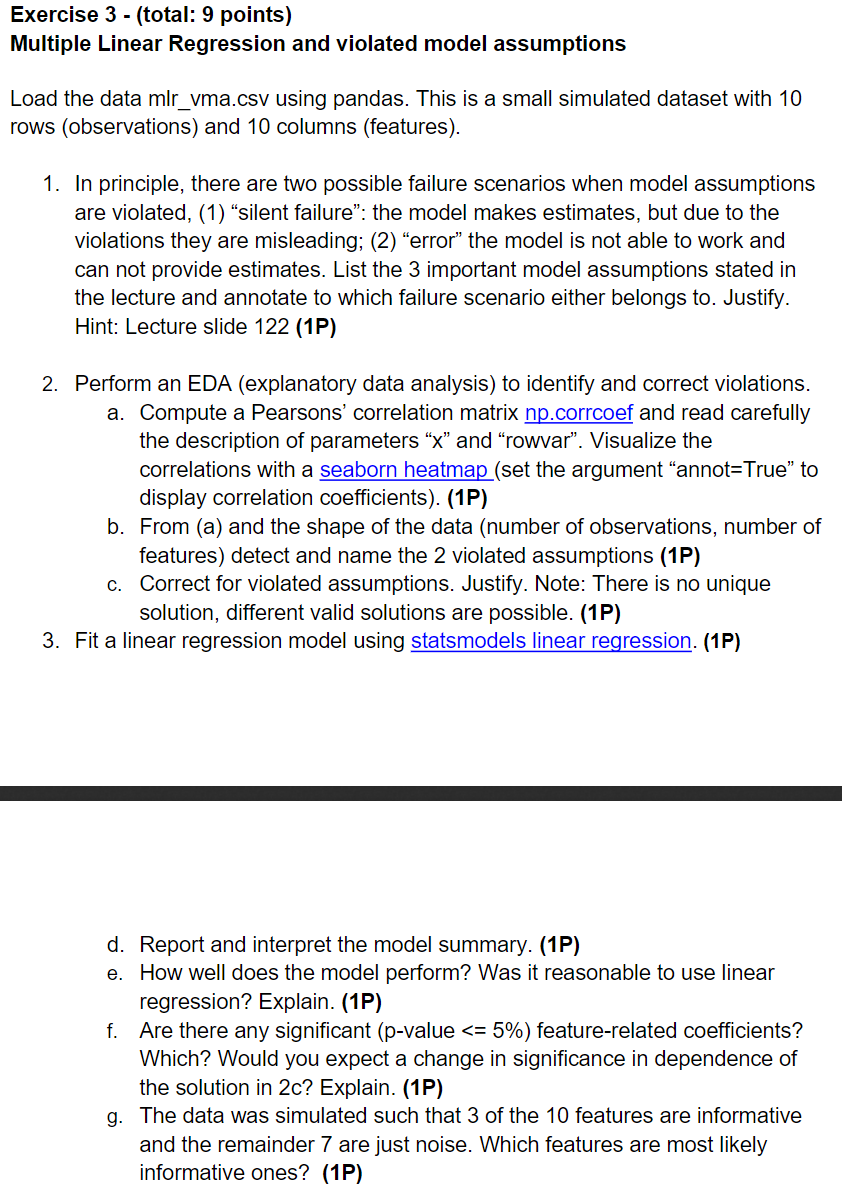

# the sample solution starts here

## 3.1

The 3 important model assumptions from the lecture and the related failure scenario
1. residuals are normally distributed
  - "silent failure", the model is technically able to make estimates, even if this assumption is violated
2. p < n
  - if this condition is violated, the matrix to be inverted to estimate the betas is singular, thus it can not be inverted and the betas can not be estimated.
3. no multi-collinearity
  - same issue as for 2 (p < n)



## 3.2

In [9]:
np.corrcoef(X).shape

(10, 10)

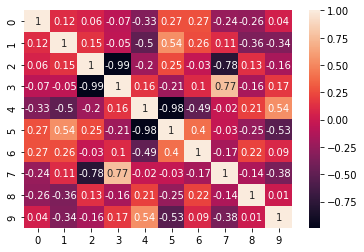

In [10]:
# multicolinearity shows up as perfect anti-correlation
sns.heatmap(np.corrcoef(X.T).round(2), annot=True)

Feature 2 and 3 are perfectly correlated, also 4 and 5. Remove redundance by dropping redundant columns. This will also solve the requirement p < n.

In [11]:
X.drop(columns=[2,4],inplace=True)

In [12]:
# now n<p
X.shape

(10, 8)

## 3.3

In [13]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
# rescale
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [15]:
# fit and evaluate
scaled2 = sm.add_constant(scaled) # add constant for intercept
est = sm.OLS(y, scaled2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.968e+04
Date:                Mon, 02 May 2022   Prob (F-statistic):            0.00274
Time:                        15:00:42   Log-Likelihood:                 19.157
No. Observations:                  10   AIC:                            -20.31
Df Residuals:                       1   BIC:                            -17.59
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4230      0.036    404.846      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


- 3d The adjusted R-squared is 1.0, this is the maximum possible score. The covariates seem to "cluster" in 2 groups: 3 of which are highly significant, and the remainder with very high p-values.

- 3d. Since the adjusted R-squared is 1.0 it performs perfect. The linear model does a perfect job here.

- 3f. Yes, in total there are 3 significant features: The first and the two last features. No change in significance will occur, depending on the solution of 2c, since the correlation was quite perfect. (Only the value of the coefficient could be different, depending on the scale and sign)

- 3g. Clearly, the first and the two last features seem to be the 3 informative ones.